In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import sys
from PIL import Image as IM
from google.colab.patches import cv2_imshow
from IPython.display import HTML
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d srthk5/facerecognition 

facerecognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip "*.zip"

Archive:  facerecognition.zip
replace me/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: me/1.jpg                
  inflating: me/10.jpg               
  inflating: me/1000.jpg             
  inflating: me/1001.jpg             
  inflating: me/1002.jpg             
  inflating: me/1003.jpg             
  inflating: me/1004.jpg             
  inflating: me/1005.jpg             
  inflating: me/1006.jpg             
  inflating: me/1008.jpg             
  inflating: me/101.jpg              
  inflating: me/1010.jpg             
  inflating: me/1011.jpg             
  inflating: me/1012.jpg             
  inflating: me/1016.jpg             
  inflating: me/1017.jpg             
  inflating: me/1018.jpg             
  inflating: me/1019.jpg             
  inflating: me/1020.jpg             
  inflating: me/1022.jpg             
  inflating: me/1023.jpg             
  inflating: me/1024.jpg             
  inflating: me/1025.jpg             
  inflating: me/1027.jpg             


In [ ]:
my_dir="/content/drive/My Drive/face recognition" 

In [ ]:
predictor = load_learner(my_dir) 

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class 

In [ ]:
all_test_images=os.listdir("/content/drive/My Drive/extract")

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


me


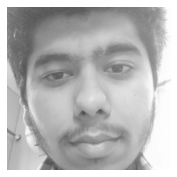

In [ ]:
idx=2
print(my_predictor("/content/drive/My Drive/extract/"+all_test_images[idx]))
img = open_image("/content/drive/My Drive/extract/"+all_test_images[idx])
img.show()

In [ ]:
def cord_face(imagePath):
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

    status = cv2.imwrite(imagePath, image)
   
    extract_face(faces,imagePath)
    return (faces,imagePath) 

In [ ]:
!mkdir frams 

mkdir: cannot create directory ‘frams’: File exists


In [ ]:
def extrac_face(faces,imagePath):
  j=0
  image = cv2.imread(imagePath)
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w] 
    gray = cv2.cvtColor(roi_color, cv2.COLOR_BGR2GRAY)
    I=IM.fromarray(gray)
    I.save("/content/frames"+str(j)+".jpg")
    j=j+1

In [ ]:
def final(faces,imagePath):
  k=0;
  for (x,y,w,h) in faces:
    img=cv2.imread(imagePath)
    img1=cv2.imread("/content/frames/"+str(k)+".jpg")
    cv2.imwrite("temp.jpg",img1)
    ans_text=my_predictor("temp.jpg")
    font = cv2.FONT_HERSHEY_SIMPLEX 
    #font = cv2.PACIFICO
    org = (x,y) 
    fontScale = 0.6
    color = (255, 160, 0) 
    thickness = 2
    img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
    cv2.imwrite(imagePath, img)
    
    k=k+1

In [ ]:
def input_img(path):
  (faces,imagePath)=cord_face(path)
  final(faces,imagePath)
  img = cv2.imread(imagePath)
  cv2_imshow(img)
  !rm /content/frames/*".jpg"

In [ ]:
input_img()

TypeError: ignored